# Estimating Pi

The following example should highlight, how one can convert most Python classes that take arguments into a PyTrack stage.
Here we take on an example to Estimate the value Pi.
The original notebook can be found here https://gist.github.com/SamTov/907aebbc6c36a242e15e3745a91989eb .
There were only a few changes made:

    1. convert parameters to `DVC.params()`
    2. convert results to `DVC.result()`
    3. Add a `__call__` method for the adding the parameters to the class
    4. Add a `run` method that does the heavy lifting for us and runs the expensive computation

That's it - now we can use the `@PyTrack()` decorator and we can even stay inside the Jupyter notebook.

In [1]:
from pytrack import PyTrackProject, config

config.nb_name = "estimate_pi_with_mc.ipynb"

project = PyTrackProject()
project.create_dvc_repository()

2021-10-19 10:02:02,490 (INFO): Setting up GIT/DVC repository.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib
from pytrack import PyTrack, DVC

In [3]:
@PyTrack()
class MCPi:
    """
    A class to study Monte Carlo sampling as applied to
    the computation of Pi.

    Attributes
    ----------
    coordinates : np.ndarray
            Coordinates of points plotted.
    n_circle_points : int
            Number of points in the circle
    n_points : int
            Total number of points.
    """
    
    coordinates = DVC.result()
    n_circle_points = DVC.result()
    n_points = DVC.params()
    
    def __call__(self, n_points):
        self.n_points = n_points

    def run(self):
        """
        Draw N points from a normal distribution.

        N : int
                Number of points to draw.
        """
        self.coordinates = np.random.random(size=(self.n_points, 2))
        self._circle_points()  # compute the number of points in the circle.
    
    def _circle_points(self):
        """
        Compute the number of points in the circle.
        """
        radial_values = np.linalg.norm(self.coordinates, axis=1)
        self.n_circle_points = len(list(filter(lambda x: x <= 1, radial_values)))
    
    def plot_image(self, axs = None):
        """
        Plot the circle, square, and points.

        Parameters
        ----------
        axs : mpl.axis
                An axis object to plot to if desired.
        """
        circle = plt.Circle((0, 0), 1, fill=False)
        square = patches.Rectangle((0, 0), 1, 1, fill=False)
        if axs is None:
            ax = plt.gca()
        else:
            ax = axs
        ax.set_xlim(-1.3, 1.3)
        ax.set_ylim(-1.3, 1.3)
        ax.spines.left.set_position('zero')
        ax.spines.right.set_color('none')
        ax.spines.bottom.set_position('zero')
        ax.spines.top.set_color('none')
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')
        ax.add_patch(circle)
        ax.add_patch(square)
        ax.set_aspect('equal')
        plt.show()

    def plot_sampling(self, axs = None, show: bool = False):
        """
        Plot the result of the sampling.

        Parameters
        ----------
        axs : mpl.axis
                An axis object to plot to if desired.
        """
        coordinates = np.array(self.coordinates)
        circle = plt.Circle((0, 0), 1, fill=False, linewidth=3, edgecolor='k', zorder=10)
        square = patches.Rectangle((0, 0), 1, 1, fill=False, linewidth=3, edgecolor='k', zorder=10)
        if axs is None:
            ax = plt.gca()
        else:
            ax = axs
        ax.set_xlim(-0.0, 1.0)
        ax.set_ylim(-0.0, 1.0)
        ax.spines.left.set_position('zero')
        ax.spines.right.set_color('none')
        ax.spines.bottom.set_position('zero')
        ax.spines.top.set_color('none')
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')
        ax.plot(coordinates[:, 0], coordinates[:, 1], '.')
        inner_points = np.array(list(filter(lambda x: np.linalg.norm(x) <= 1, coordinates)))
        ax.plot(inner_points[:, 0], inner_points[:, 1], 'r.')
        ax.add_patch(circle)
        ax.add_patch(square)
        ax.set_title(f"N: {self.n_points} ; $\pi$ = {4 * self.n_circle_points / self.n_points}")
        ax.set_aspect('equal')

        if show:
            plt.show()

2021-10-19 10:02:05,343 (WARNING): Jupyter support is an experimental feature! Please save your notebook before running this command!
Submit issues to https://github.com/zincware/py-track.


[NbConvertApp] Converting notebook estimate_pi_with_mc.ipynb to script
[NbConvertApp] Writing 5159 bytes to estimate_pi_with_mc.py


Now let us define pi estimates with different numbers of points and run them all.

In [4]:
mc_study = MCPi()
mc_study(n_points=10000)
project.name="n=10000"
project.queue()

mc_study(n_points=1000)
project.name="n=1000"
project.queue()

mc_study(n_points=100)
project.name="n=100"
project.run()

2021-10-19 10:02:08,444 (WARNING): --- Writing new DVC file! ---
2021-10-19 10:02:08,444 (WARNING): Overwriting existing configuration!
2021-10-19 10:02:11,431 (INFO): Creating 'dvc.yaml'
Adding stage 'MCPi' in 'dvc.yaml'

To track the changes with git, run:

	git add dvc.yaml outs/.gitignore

2021-10-19 10:02:11,441 (INFO): Running git add
2021-10-19 10:02:11,553 (INFO): Queue DVC stage
Queued experiment '21ab248' for future execution.
2021-10-19 10:02:13,821 (WARNING): --- Writing new DVC file! ---
2021-10-19 10:02:13,822 (WARNING): Overwriting existing configuration!
2021-10-19 10:02:16,935 (INFO): Modifying stage 'MCPi' in 'dvc.yaml'

To track the changes with git, run:

	git add dvc.yaml

2021-10-19 10:02:16,942 (INFO): Running git add
2021-10-19 10:02:16,979 (INFO): Queue DVC stage
Queued experiment '8d5279d' for future execution.
2021-10-19 10:02:19,067 (WARNING): --- Writing new DVC file! ---
2021-10-19 10:02:19,068 (WARNING): Overwriting existing configuration!
2021-10-19 10:0

	outs/.gitignore, src/__pycache__/MCPi.cpython-39.pyc


Running stage 'MCPi':
> python3 -c "from src.MCPi import MCPi; MCPi(load=True).run()"
2021-10-19 10:02:34,244 (WARNING): No results found!
Generating lock file 'dvc.lock'
Updating lock file 'dvc.lock'


	outs/.gitignore, src/__pycache__/MCPi.cpython-39.pyc


Running stage 'MCPi':
> python3 -c "from src.MCPi import MCPi; MCPi(load=True).run()"
2021-10-19 10:02:37,448 (WARNING): No results found!
Generating lock file 'dvc.lock'
Updating lock file 'dvc.lock'


	outs/.gitignore, src/__pycache__/MCPi.cpython-39.pyc



Reproduced experiment(s): n=100, n=1000, n=10000
To apply the results of an experiment to your workspace run:

	dvc exp apply <exp>

To promote an experiment to a Git branch run:

	dvc exp branch <exp> <branch>

2021-10-19 10:02:39,276 (INFO): Running git add
Changes for experiment 'n=100' have been applied to your current workspace.
2021-10-19 10:02:41,716 (INFO): Finished


We can now see our experiments and the respective hash values:


Let us load them and plot them after each other. Because all the calculations where already performed, this is simply loading the correct result files.

Changes for experiment 'n=10000' have been applied to your current workspace.


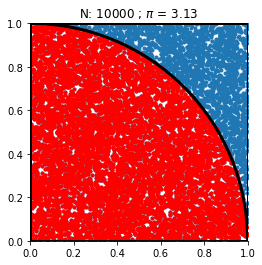

Changes for experiment 'n=1000' have been applied to your current workspace.


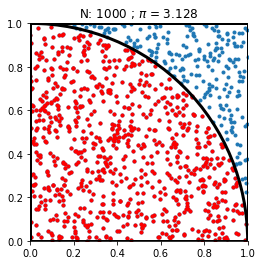

Changes for experiment 'n=100' have been applied to your current workspace.


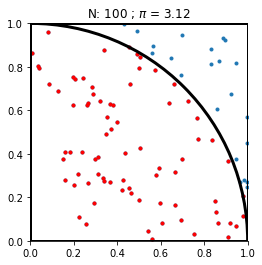

In [5]:
project.load("n=10000")
MCPi(load=True).plot_sampling(show=True)
project.load("n=1000")
MCPi(load=True).plot_sampling(show=True)
project.load("n=100")
MCPi(load=True).plot_sampling(show=True)

In [6]:
MCPi(load=True).coordinates

array([[0.29524168, 0.17217693],
       [0.36526767, 0.62690072],
       [0.08856819, 0.71990031],
       [0.85818655, 0.60479041],
       [0.57861213, 0.30281645],
       [0.86306181, 0.08051931],
       [0.5611311 , 0.86510228],
       [0.34700228, 0.49148812],
       [0.59810045, 0.17577229],
       [0.65953835, 0.72156357],
       [0.50535769, 0.4253979 ],
       [0.20240977, 0.2585801 ],
       [0.45258089, 0.24066177],
       [0.4525156 , 0.8909636 ],
       [0.98095814, 0.11471191],
       [0.23593229, 0.40663346],
       [0.94857977, 0.81854388],
       [0.42837471, 0.2805762 ],
       [0.83301333, 0.88216096],
       [0.22463214, 0.10982317],
       [0.25885594, 0.07657762],
       [0.83089497, 0.81137601],
       [0.76637994, 0.56425477],
       [0.94495406, 0.06660361],
       [0.97825466, 0.20538377],
       [0.89736968, 0.92378189],
       [0.69310061, 0.09569714],
       [0.76960442, 0.47028594],
       [0.60544999, 0.08015923],
       [0.41997965, 0.2344265 ],
       [0.